EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
#데이터의 형태
df.shape

(205, 26)

In [3]:
#결측치 확인
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
#데이터의 type확인
numerical_feats = df.dtypes[df.dtypes != "object"].index 
print("Number of Numerical features: ", len(numerical_feats)) 
categorical_feats = df.dtypes[df.dtypes == "object"].index 
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  16
Number of Categorical features:  10


In [5]:
#데이터의 type에 따른 변수명 확인
print('numerical_feats : ',df[numerical_feats].columns)
print("*"*80)
print('categorical_feats : ',df[categorical_feats].columns)

numerical_feats :  Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
********************************************************************************
categorical_feats :  Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


In [ ]:
# # feature을 반복하며 IQR 범위를 넘어가는 index를 찾는다. index가 n(2)번 이상 나온 경우 multiple_outliers에 저장해 return
# from collections import Counter

# def detect_outliers(df, n, features):
#     outlier_indices = []
#     for col in features:
#         Q1 = np.percentile(df[col], 25)
#         Q3 = np.percentile(df[col], 75)
#         IQR = Q3 - Q1
        
#         outlier_step = 1.5 * IQR
        
#         outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
#         outlier_indices.extend(outlier_list_col)
        
#     # select observations containing more than 2 outliers
#     outlier_indices = Counter(outlier_indices)
#     multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
        
#     return multiple_outliers
        
# Outliers_to_drop = detect_outliers(df, 2, ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
#        'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
#        'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
#        'price'])

# # train 데이터의 이상치를 탐색합니다.
# # IQR(튜키의 방법)을 이용한 함수를 지정하여 이상치 탐색을 수행합니다.

# df.loc[Outliers_to_drop]

In [6]:
#수치형 특징 확인
print(df[['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']])

     car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1          3       88.6      168.8      64.1       48.8        2548   
1         2          3       88.6      168.8      64.1       48.8        2548   
2         3          1       94.5      171.2      65.5       52.4        2823   
3         4          2       99.8      176.6      66.2       54.3        2337   
4         5          2       99.4      176.6      66.4       54.3        2824   
..      ...        ...        ...        ...       ...        ...         ...   
200     201         -1      109.1      188.8      68.9       55.5        2952   
201     202         -1      109.1      188.8      68.8       55.5        3049   
202     203         -1      109.1      188.8      68.9       55.5        3012   
203     204         -1      109.1      188.8      68.9       55.5        3217   
204     205         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio 

In [7]:
#문자형 특징 확인
print(df[['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']])

                      CarName fueltype aspiration doornumber      carbody  \
0          alfa-romero giulia      gas        std        two  convertible   
1         alfa-romero stelvio      gas        std        two  convertible   
2    alfa-romero Quadrifoglio      gas        std        two    hatchback   
3                 audi 100 ls      gas        std       four        sedan   
4                  audi 100ls      gas        std       four        sedan   
..                        ...      ...        ...        ...          ...   
200           volvo 145e (sw)      gas        std       four        sedan   
201               volvo 144ea      gas      turbo       four        sedan   
202               volvo 244dl      gas        std       four        sedan   
203                 volvo 246   diesel      turbo       four        sedan   
204               volvo 264gl      gas      turbo       four        sedan   

    drivewheel enginelocation enginetype cylindernumber fuelsystem  
0     

In [8]:
#특징의 종류 확인
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

<AxesSubplot:>

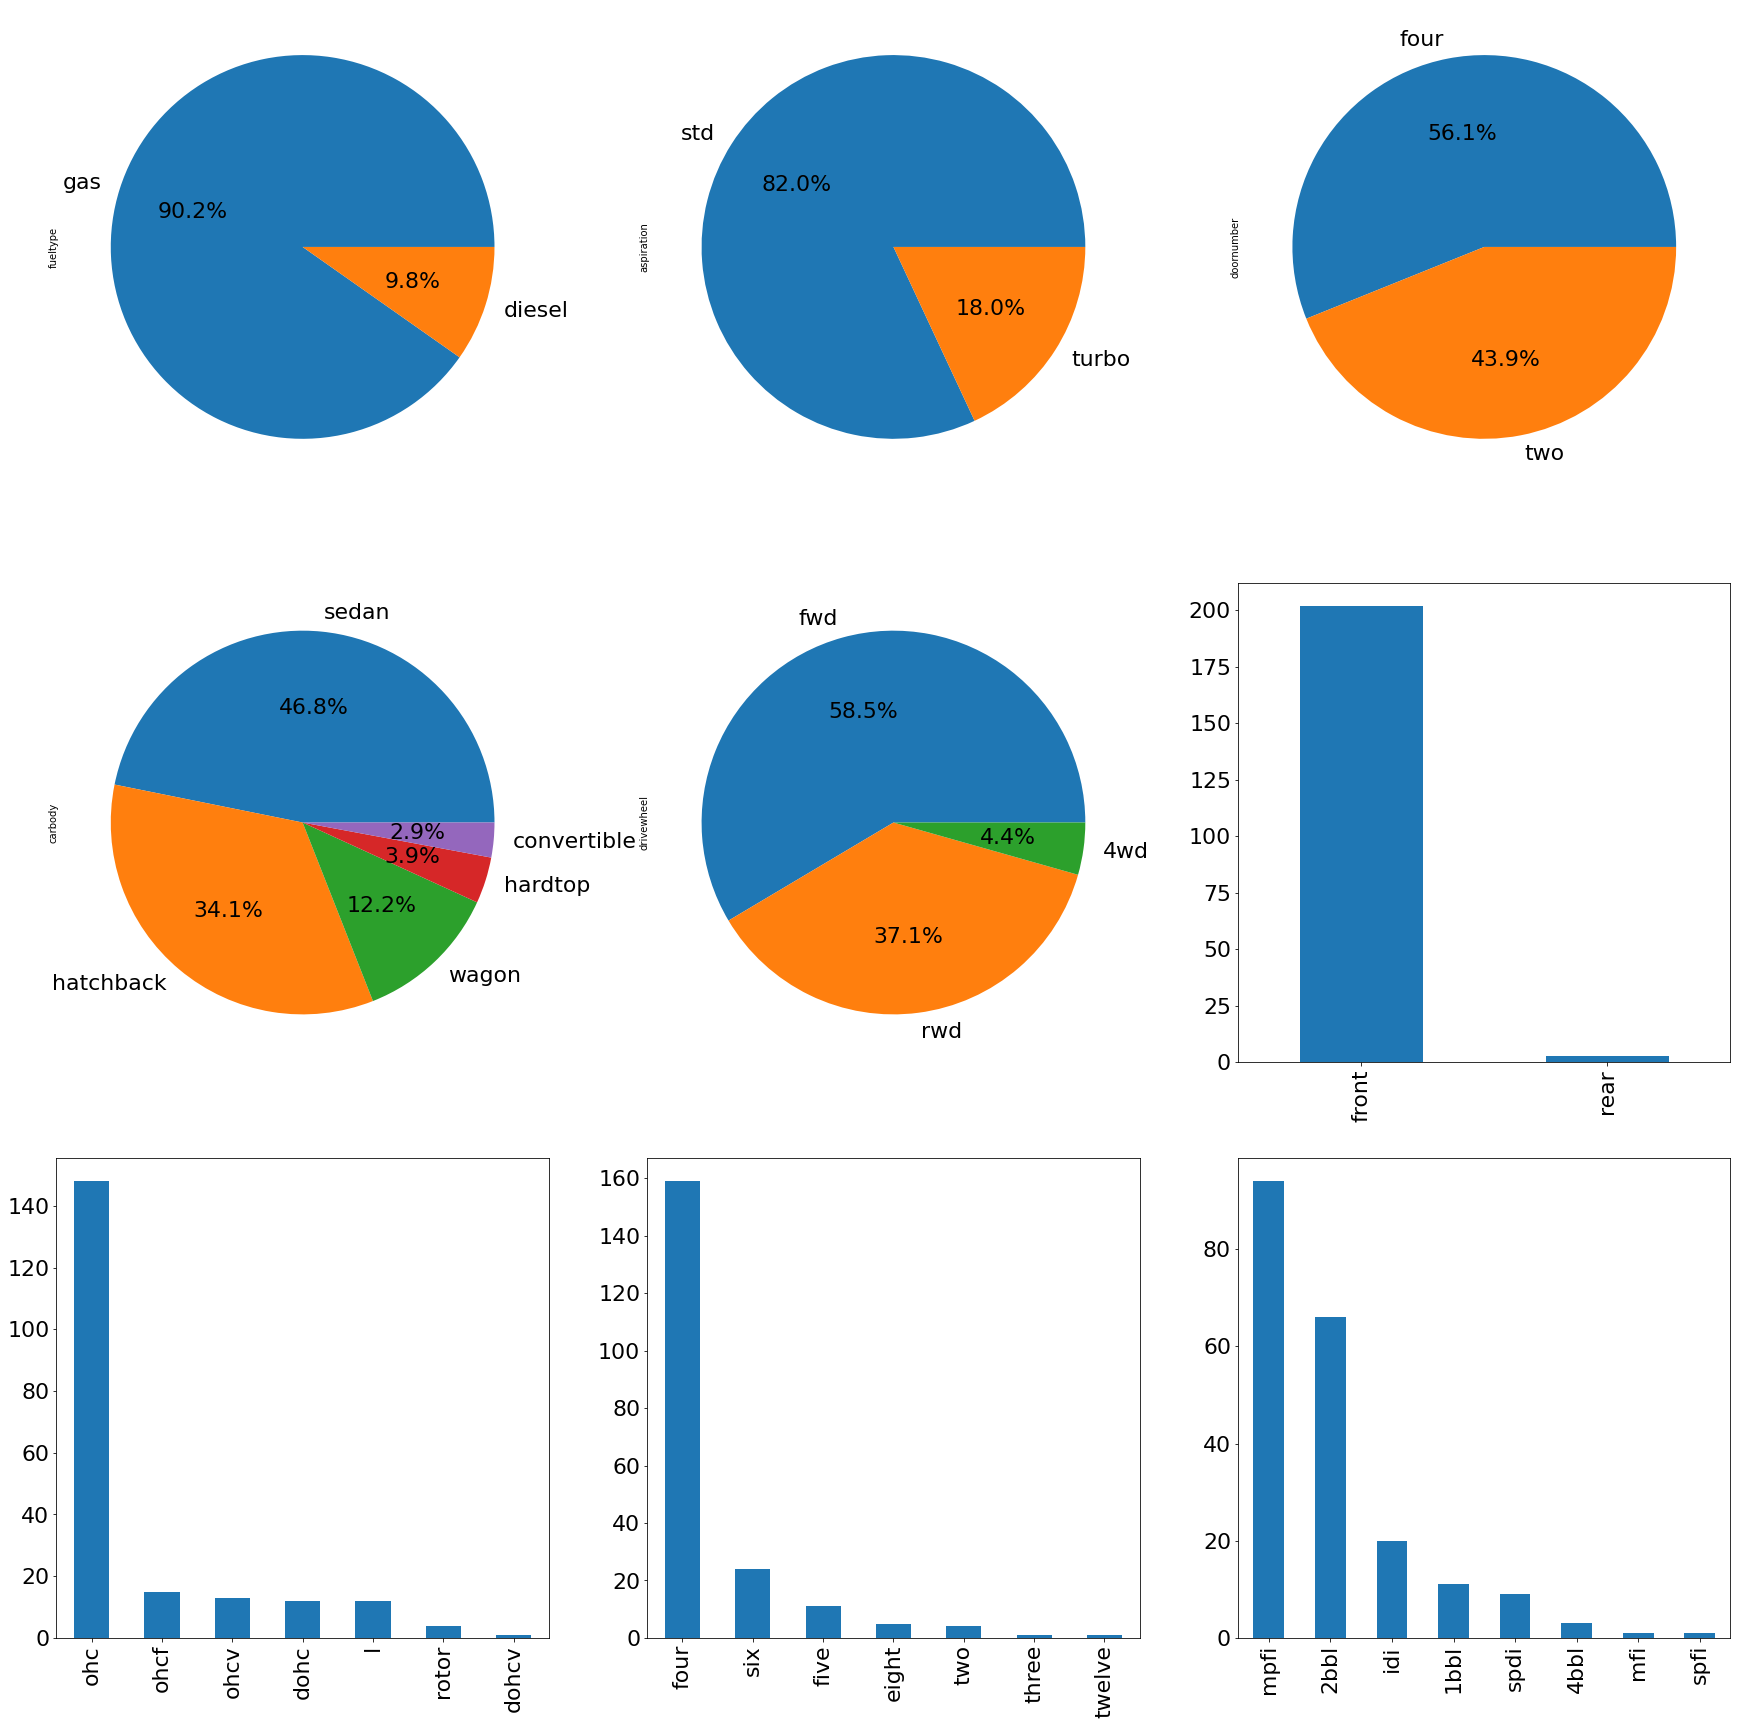

In [9]:
#문자형 특징 구성비 확인

f, ax = plt.subplots(3, 3, figsize=(30, 30))

df['fueltype'].value_counts().plot.pie(ax=ax[0,0],fontsize=22,  autopct='%1.1f%%') #2개로 원핫 가능
df['aspiration'].value_counts().plot.pie(ax=ax[0,1],fontsize=22,  autopct='%1.1f%%') #2개로 원핫 가능
df['doornumber'].value_counts().plot.pie(ax=ax[0,2],fontsize=22,  autopct='%1.1f%%') #2개로 원핫 가능
df['carbody'].value_counts().plot.pie(ax=ax[1,0],fontsize=22,  autopct='%1.1f%%') #5개로 원핫 가능
df['drivewheel'].value_counts().plot.pie(ax=ax[1,1],fontsize=22,  autopct='%1.1f%%') #3개로 원핫 가능
df['enginelocation'].value_counts().plot.bar(ax=ax[1,2],fontsize=22) #2개로 원핫 가능
df['enginetype'].value_counts().plot.bar(ax=ax[2,0],fontsize=22) #7개로 원핫 가능
df['cylindernumber'].value_counts().plot.bar(ax=ax[2,1],fontsize=22) #7개로 원핫 가능
df['fuelsystem'].value_counts().plot.bar(ax=ax[2,2],fontsize=22) #8개로 원핫 가능

In [80]:
#carname 특징은 구성이 많아서 따로 확인 
#company라는 새로운 열을 구축해서 회사 이름만 추출함
df['Company'] = 0
num=0

#먼저 대소문자를 모두 소문자로 변환함
for i in df['CarName']:
    df['CarName'].iloc[num] = df['CarName'].iloc[num].lower()
    num+=1

for i in df['CarName']:
    df['Company'] = df.CarName.str.extract('([A-Za-z]+)\ ')

print(df['Company'])
print(df['Company'].unique())

print(df.shape)

print(df['Company'].value_counts())

0      romero
1      romero
2      romero
3        audi
4        audi
        ...  
200     volvo
201     volvo
202     volvo
203     volvo
204     volvo
Name: Company, Length: 205, dtype: object
['romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' nan 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
(205, 27)
toyota        31
nissan        18
mazda         15
mitsubishi    13
honda         13
peugeot       11
volvo         11
subaru        10
volkswagen     9
dodge          9
buick          8
bmw            8
audi           7
plymouth       7
saab           6
isuzu          4
porsche        4
jaguar         3
romero         3
chevrolet      3
renault        2
maxda          2
vw             2
toyouta        1
vokswagen      1
mercury        1
porcshce       1
Name: Company, dtype: int64


C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [83]:
#nan의 개수 확인
print(df['Company'].isnull().sum())
#nan이 있는 행의 위치 확인
print(df[df['Company'].isnull()])

2
     car_ID  symboling CarName fueltype aspiration doornumber    carbody  \
138     139          2  subaru      gas        std        two  hatchback   
141     142          0  subaru      gas        std       four      sedan   

    drivewheel enginelocation  wheelbase  ...  fuelsystem  boreratio  stroke  \
138        fwd          front       93.7  ...        2bbl       3.62    2.36   
141        fwd          front       97.2  ...        2bbl       3.62    2.64   

     compressionratio horsepower peakrpm  citympg highwaympg   price  Company  
138               9.0         69    4900       31         36  5118.0      NaN  
141               9.5         82    4800       32         37  7126.0      NaN  

[2 rows x 27 columns]


In [87]:
#결측치 'subaru'로 할당
df.fillna('subaru',inplace=True)
print(df['Company'].isnull().sum())
print(df['Company'].unique())
print(df['Company'].value_counts())

0
['romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
toyota        31
nissan        18
mazda         15
honda         13
mitsubishi    13
subaru        12
peugeot       11
volvo         11
dodge          9
volkswagen     9
bmw            8
buick          8
audi           7
plymouth       7
saab           6
isuzu          4
porsche        4
romero         3
jaguar         3
chevrolet      3
vw             2
maxda          2
renault        2
toyouta        1
vokswagen      1
mercury        1
porcshce       1
Name: Company, dtype: int64


In [93]:
#같은 회사 이름 묶기
df.loc[(df['Company']=='maxda')|(df['Company']=='mazda'),'Company'] = 'mazda'
df.loc[(df['Company']=='toyota')|(df['Company']=='toyouta'),'Company'] = 'toyota'
df.loc[(df['Company']=='porsche')|(df['Company']=='porcshce'),'Company'] = 'porsche'
df.loc[(df['Company']=='vokswagen')|(df['Company']=='volkswagen')|(df['Company']=='vw'),'Company'] = 'volkswagen'

In [94]:
print(df['Company'].unique())

['romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


<AxesSubplot:>

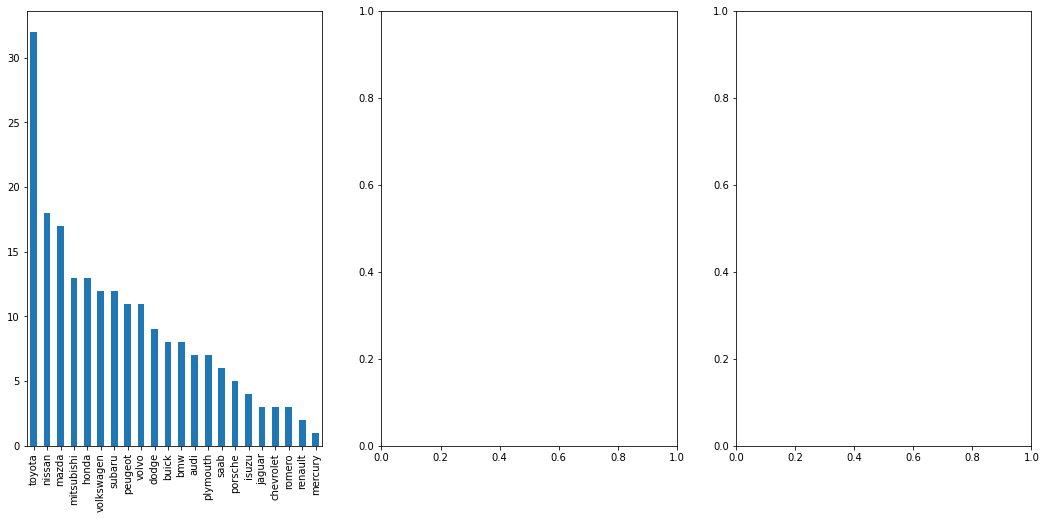

In [95]:
f, ax = plt.subplots(1, 3, figsize=(18, 8))
df['Company'].value_counts().plot.bar(ax=ax[0]) #28개로 원핫 가능

<AxesSubplot:xlabel='Company', ylabel='price'>

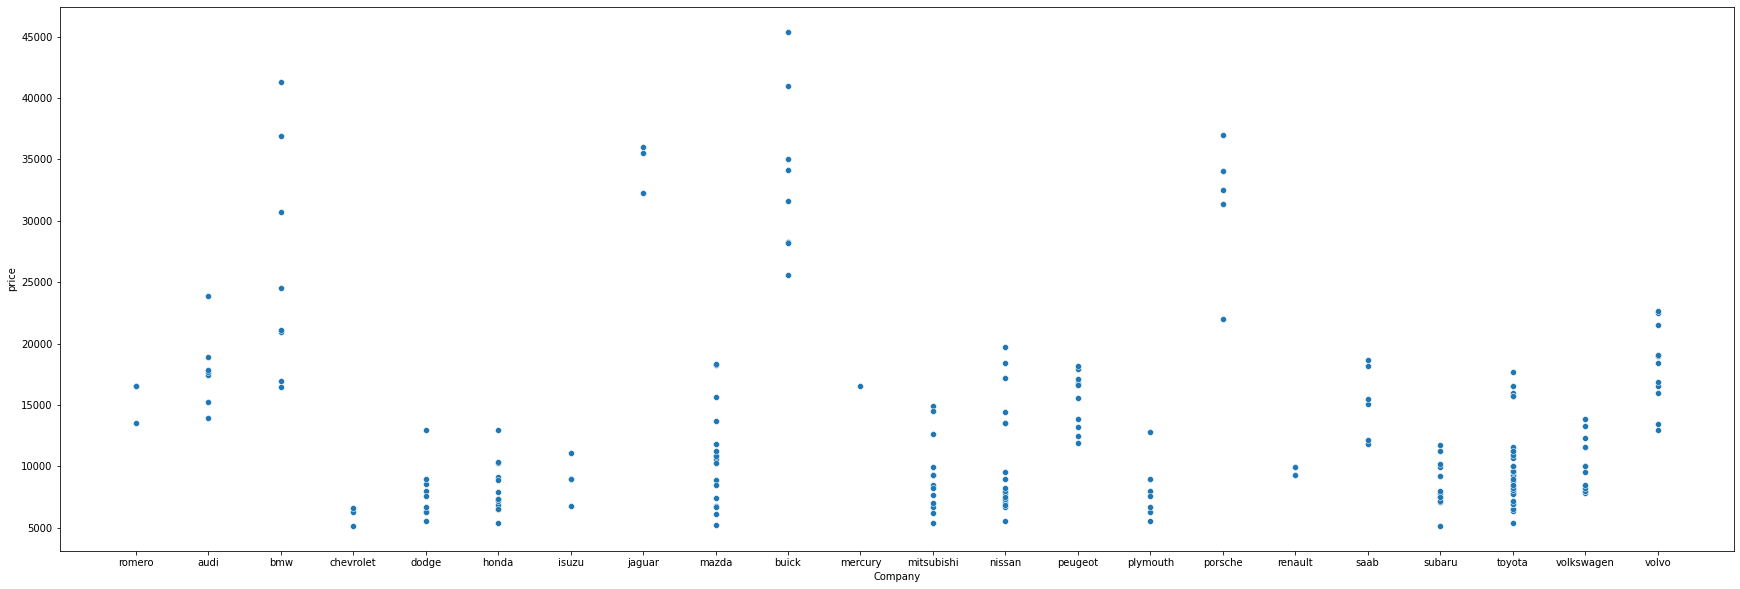

In [100]:
x_data = df['Company']
y_data = df['price']

plt.figure(figsize=(30, 10))
sns.scatterplot(x = x_data, y = y_data)

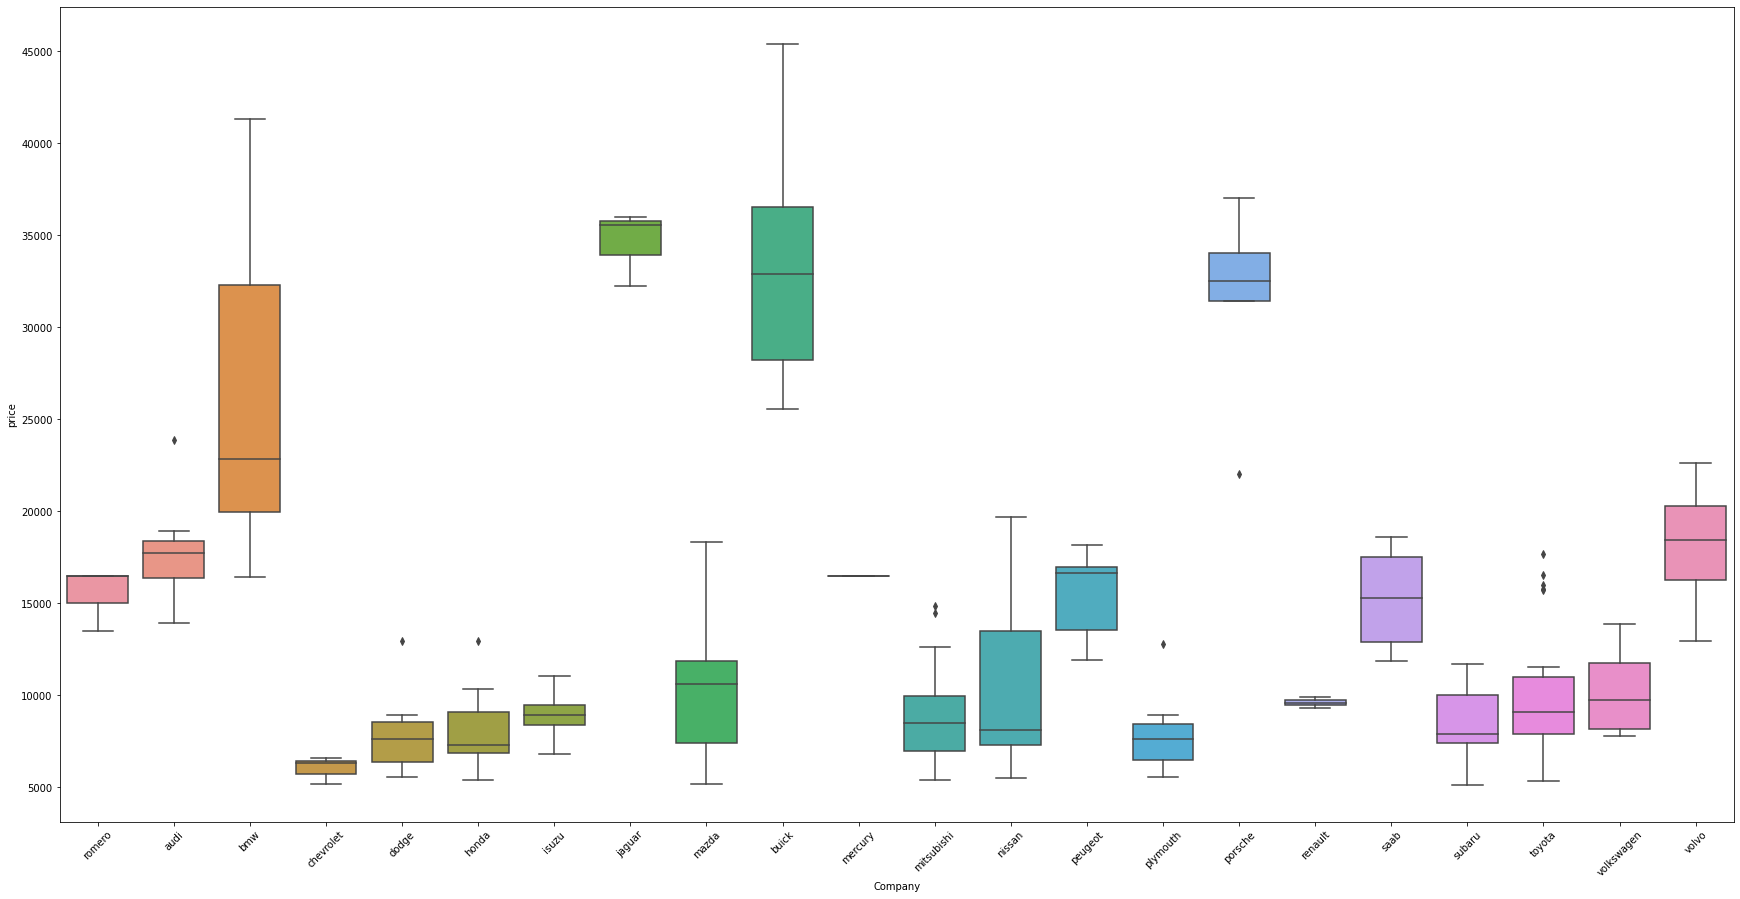

In [105]:
plt.figure(figsize=(30,15))
sns.boxplot(x=df['Company'], y=df["price"], data=df)
plt.xticks(rotation=45)
plt.show()

In [166]:
score_mean = df.groupby('Company').price.mean()
print(score_mean.sort_values())
print(score_mean.rank(ascending=True).sort_values())

Company
chevrolet      6007.000000
dodge          7875.444444
plymouth       7963.428571
honda          8184.692308
subaru         8541.250000
isuzu          8916.500000
mitsubishi     9239.769231
renault        9595.000000
toyota         9885.812500
volkswagen    10077.500000
nissan        10415.666667
mazda         10652.882353
saab          15223.333333
peugeot       15489.090909
romero        15498.333333
mercury       16503.000000
audi          17859.166714
volvo         18063.181818
bmw           26118.750000
porsche       31400.500000
buick         33647.000000
jaguar        34600.000000
Name: price, dtype: float64
Company
chevrolet      1.0
dodge          2.0
plymouth       3.0
honda          4.0
subaru         5.0
isuzu          6.0
mitsubishi     7.0
renault        8.0
toyota         9.0
volkswagen    10.0
nissan        11.0
mazda         12.0
saab          13.0
peugeot       14.0
romero        15.0
mercury       16.0
audi          17.0
volvo         18.0
bmw           19.0
p

In [185]:
list_tmp = ['chevrolet', 'dodge', 'plymouth', 'honda', 'subaru', 'isuzu', 'mitsubishi', 'renault', 'toyota', 'volkswagen', 'nissan', 'mazda', 'saab', 'peugeot', 'romero', 'mercury', 'audi', 'volvo', 'bmw', 'porsche', 'buick','jaguar']

df['Company_rank'] = df['Company']

num =0
for i in df['Company_rank']:
    if i in list_tmp:
        df.Company_rank[num] = list_tmp.index(i)
    num+=1

C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [187]:
print(df[['Company_rank','Company']])
print(df['Company_rank'].isnull().sum())

    Company_rank Company
0             14  romero
1             14  romero
2             14  romero
3             16    audi
4             16    audi
..           ...     ...
200           17   volvo
201           17   volvo
202           17   volvo
203           17   volvo
204           17   volvo

[205 rows x 2 columns]
0


In [271]:
#conmany rank 특성을 문자형에서 숫자로 변환함
df['Company_rank'] = pd.to_numeric(df['Company_rank'])

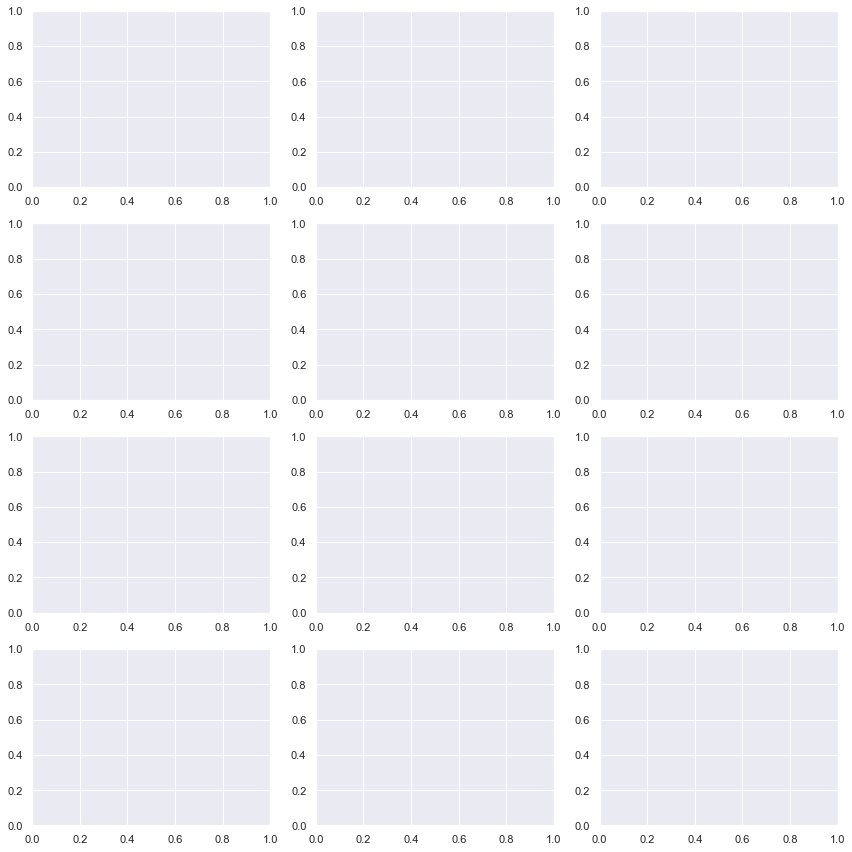

In [312]:
# BoxPlot을 그려 Categorical Feature와 price의 관계를 확인합니다.

li_cat_feats = list(categorical_feats)
nr_rows = 4
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=df["price"], data=df, ax = axs[r][c])
    
plt.tight_layout()
plt.show()

#!fueltype, door number, aspiration는 drop을 결정합니다.
#!carbody는 convert, hardtop/나머지로 묶기
#!drivewheel은 fwd,4wd/rwd로 묶기
#!enginelocation도 각각 묶기
#!enginetype은 ohc,ohcf/rotor/dohc,l/ohcv/dohcv 묶기
#!cylinder number는 three/four/two/six,five/twelve,eight 묶기
#!fuelsystem은 2bbl,1bbl/spfi,mfi,4bbl/spdi/idi,mpfi묶기

In [191]:
pd.crosstab(df.enginelocation, df.price).style.background_gradient(cmap='summer_r')

price,5118.0,5151.0,5195.0,5348.0,5389.0,5399.0,5499.0,5572.0,6095.0,6189.0,6229.0,6295.0,6338.0,6377.0,6479.0,6488.0,6529.0,6575.0,6649.0,6669.0,6692.0,6695.0,6785.0,6795.0,6849.0,6855.0,6918.0,6938.0,6989.0,7053.0,7099.0,7126.0,7129.0,7198.0,7295.0,7299.0,7349.0,7395.0,7463.0,7499.0,7603.0,7609.0,7689.0,7738.0,7775.0,7788.0,7799.0,7895.0,7898.0,7957.0,7975.0,7995.0,7999.0,8013.0,8058.0,8189.0,8195.0,8238.0,8249.0,8358.0,8449.0,8495.0,8499.0,8558.0,8778.0,8845.0,8916.5,8921.0,8948.0,8949.0,9095.0,9233.0,9258.0,9279.0,9295.0,9298.0,9495.0,9538.0,9549.0,9639.0,9895.0,9959.0,9960.0,9980.0,9988.0,9989.0,9995.0,10198.0,10245.0,10295.0,10345.0,10595.0,10698.0,10795.0,10898.0,10945.0,11048.0,11199.0,11245.0,11248.0,11259.0,11549.0,11595.0,11694.0,11845.0,11850.0,11900.0,12170.0,12290.0,12440.0,12629.0,12764.0,12940.0,12945.0,12964.0,13200.0,13295.0,13415.0,13495.0,13499.0,13645.0,13845.0,13860.0,13950.0,14399.0,14489.0,14869.0,15040.0,15250.0,15510.0,15580.0,15645.0,15690.0,15750.0,15985.0,15998.0,16430.0,16500.0,16503.0,16515.0,16558.0,16630.0,16695.0,16845.0,16900.0,16925.0,17075.0,17199.0,17450.0,17669.0,17710.0,17859.167,17950.0,18150.0,18280.0,18344.0,18399.0,18420.0,18620.0,18920.0,18950.0,19045.0,19699.0,20970.0,21105.0,21485.0,22018.0,22470.0,22625.0,23875.0,24565.0,25552.0,28176.0,28248.0,30760.0,31400.5,31600.0,32250.0,32528.0,34028.0,34184.0,35056.0,35550.0,36000.0,36880.0,37028.0,40960.0,41315.0,45400.0
enginelocation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
front,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1,2,1,1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,2,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,1,1
rear,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0


In [192]:
#가격의 정보를 확인해봄
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


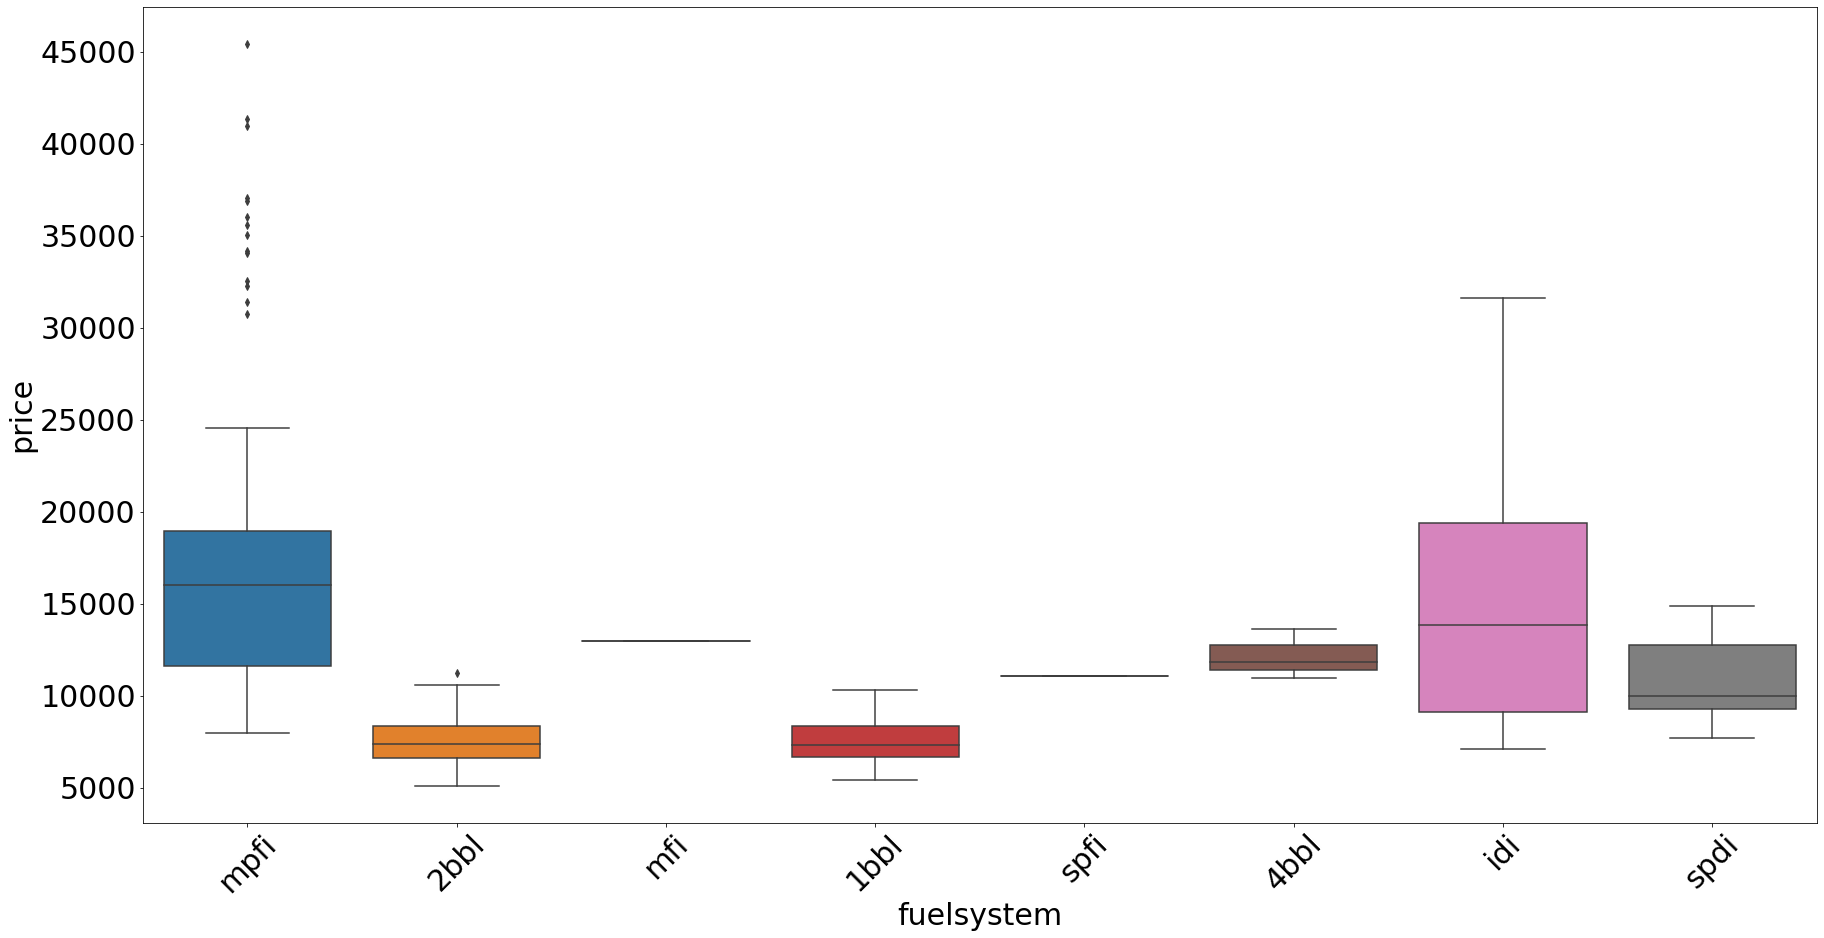

In [201]:
print(df['fuelsystem'].unique())

plt.figure(figsize=(30,15))
plt.rc('font',size=30)
sns.boxplot(x=df['fuelsystem'], y=df["price"], data=df)
plt.xticks(rotation=45)
plt.show()

In [249]:
#!모두 분류 기준에 따라서 가격 상승 관계라 판단했기에 원핫을 사용하지는 않았음
#carbody는 convert, hardtop/나머지로 묶기
df['Carbody_band'] = 0
df.loc[(df['carbody']=='hatchback')|(df['carbody']=='sedan')|(df['carbody']=='wagon'),'Carbody_band'] = 0
df.loc[(df['carbody']=='convert')|(df['carbody']=='hardtop'),'Carbody_band'] = 1

#drivewheel은 fwd,4wd/rwd로 묶기
df['drivewheel_band'] = 0
df.loc[(df['drivewheel']=='fwd')|(df['drivewheel']=='4wd'),'drivewheel_band'] = 0
df.loc[(df['drivewheel']=='rwd'),'drivewheel_band'] = 1

#enginelocation도 각각 묶기
df['enginelocation_band'] = 0
df.loc[(df['enginelocation']=='front'),'enginelocation_band'] = 0
df.loc[(df['enginelocation']=='rear'),'enginelocation_band'] = 1

#enginetype은 ohc,ohcf/rotor/dohc,l/ohcv/dohcv 묶기
df['enginetype_band'] = 0
df.loc[(df['enginetype']=='ohc')|(df['enginetype']=='ohcf'),'enginetype_band'] = 0
df.loc[(df['enginetype']=='rotor'),'enginetype_band'] = 1
df.loc[(df['enginetype']=='dohc')|(df['enginetype']=='l'),'enginetype_band'] = 2
df.loc[(df['enginetype']=='ohcv'),'enginetype_band'] = 3
df.loc[(df['enginetype']=='dohcv'),'enginetype_band'] = 4

#cylinder number는 three/four/two/six,five/twelve,eight 묶기
df['cylindernumber_band'] = 0
df.loc[df['cylindernumber']=='three','cylindernumber_band'] = 0
df.loc[df['cylindernumber']=='four','cylindernumber_band'] = 1
df.loc[df['cylindernumber']=='two','cylindernumber_band'] = 2
df.loc[(df['cylindernumber']=='five')|(df['cylindernumber']=='six'),'cylindernumber_band'] = 3
df.loc[(df['cylindernumber']=='eight')|(df['cylindernumber']=='twelve'),'cylindernumber_band'] = 4

#fuelsystem은 2bbl,1bbl/spfi,mfi,4bbl/spdi/idi,mpfi묶기
df['fuelsystem_band'] = 0
df.loc[(df['fuelsystem']=='2bbl')|(df['fuelsystem']=='1bbl'),'fuelsystem_band'] = 0
df.loc[(df['fuelsystem']=='spfi')|(df['fuelsystem']=='mfi')|(df['fuelsystem']=='4bbl'),'fuelsystem_band'] = 1
df.loc[(df['fuelsystem']=='spdi'),'fuelsystem_band'] = 2
df.loc[(df['fuelsystem']=='idi')|(df['fuelsystem']=='mpfi'),'fuelsystem_band'] = 3

In [250]:
print(df['Carbody_band'].isnull().sum())
print(df['drivewheel_band'].isnull().sum())
print(df['enginelocation_band'].isnull().sum())
print(df['enginetype_band'].isnull().sum())
print(df['cylindernumber_band'].isnull().sum())
print(df['fuelsystem_band'].isnull().sum())

0
0
0
0
0
0


In [252]:
print(df['Carbody_band'].unique())
print(df['drivewheel_band'].unique())
print(df['enginelocation_band'].unique())
print(df['enginetype_band'].unique())
print(df['cylindernumber_band'].unique())
print(df['fuelsystem_band'].unique())

[0 1]
[1 0]
[0 1]
[2 3 0 1 4]
[1 3 0 4 2]
[3 0 1 2]


In [259]:
#drop을 통해서 특성 정리 수행
print(df.shape)
df = df.drop(columns=['carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'fueltype','doornumber','aspiration', 'CarName', 'Company'])
print(df.shape)

(205, 34)
(205, 25)


In [277]:
#문자형 특성이 아직 존재하는지 확인
categorical_feats = df.dtypes[df.dtypes == "object"].index 
print("Number of Categorical features: ", len(categorical_feats))
print('categorical_feats : ',df[categorical_feats].columns)

Number of Categorical features:  0
categorical_feats :  Index([], dtype='object')


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_ID               205 non-null    int64  
 1   symboling            205 non-null    int64  
 2   wheelbase            205 non-null    float64
 3   carlength            205 non-null    float64
 4   carwidth             205 non-null    float64
 5   carheight            205 non-null    float64
 6   curbweight           205 non-null    int64  
 7   enginesize           205 non-null    int64  
 8   boreratio            205 non-null    float64
 9   stroke               205 non-null    float64
 10  compressionratio     205 non-null    float64
 11  horsepower           205 non-null    int64  
 12  peakrpm              205 non-null    int64  
 13  citympg              205 non-null    int64  
 14  highwaympg           205 non-null    int64  
 15  price                205 non-null    flo

<AxesSubplot:title={'center':'Correlation of Numeric Features with Sale Price'}>

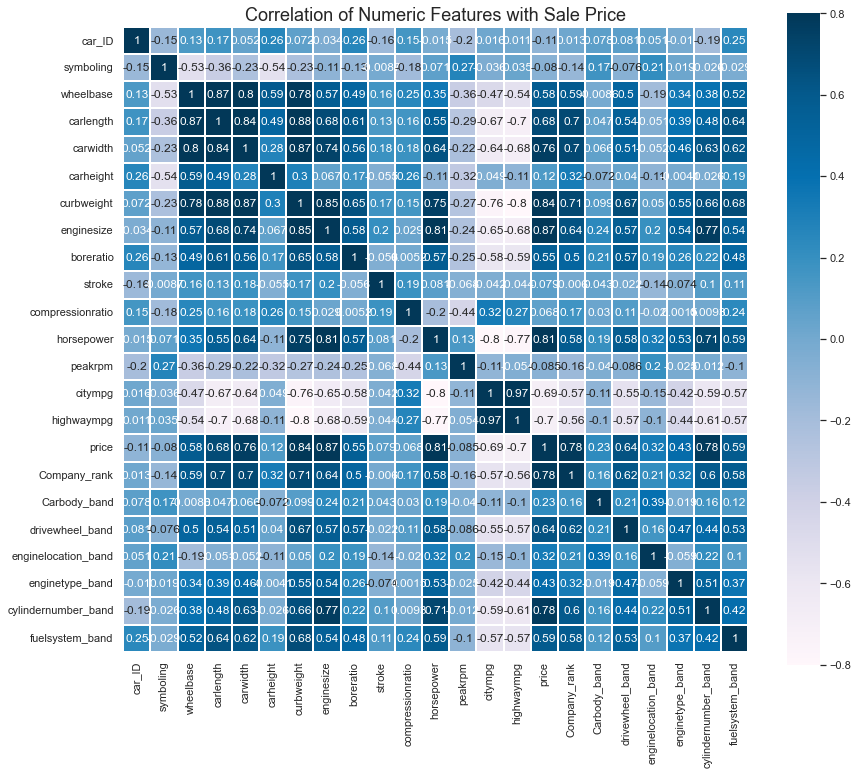

In [278]:
colormap = plt.cm.PuBu
sns.set(font_scale=1.0)

f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with Sale Price',y=1,size=18)
sns.heatmap(df.corr(), square = True, linewidths = 0.1, annot = True,
            cmap = colormap, linecolor = "white", vmax=0.8)

Index(['price', 'enginesize', 'curbweight', 'horsepower', 'Company_rank',
       'cylindernumber_band', 'carwidth', 'carlength', 'drivewheel_band',
       'fuelsystem_band', 'wheelbase', 'boreratio', 'enginetype_band',
       'enginelocation_band', 'Carbody_band', 'carheight', 'stroke',
       'compressionratio', 'symboling', 'peakrpm', 'car_ID', 'citympg',
       'highwaympg'],
      dtype='object')


<AxesSubplot:>

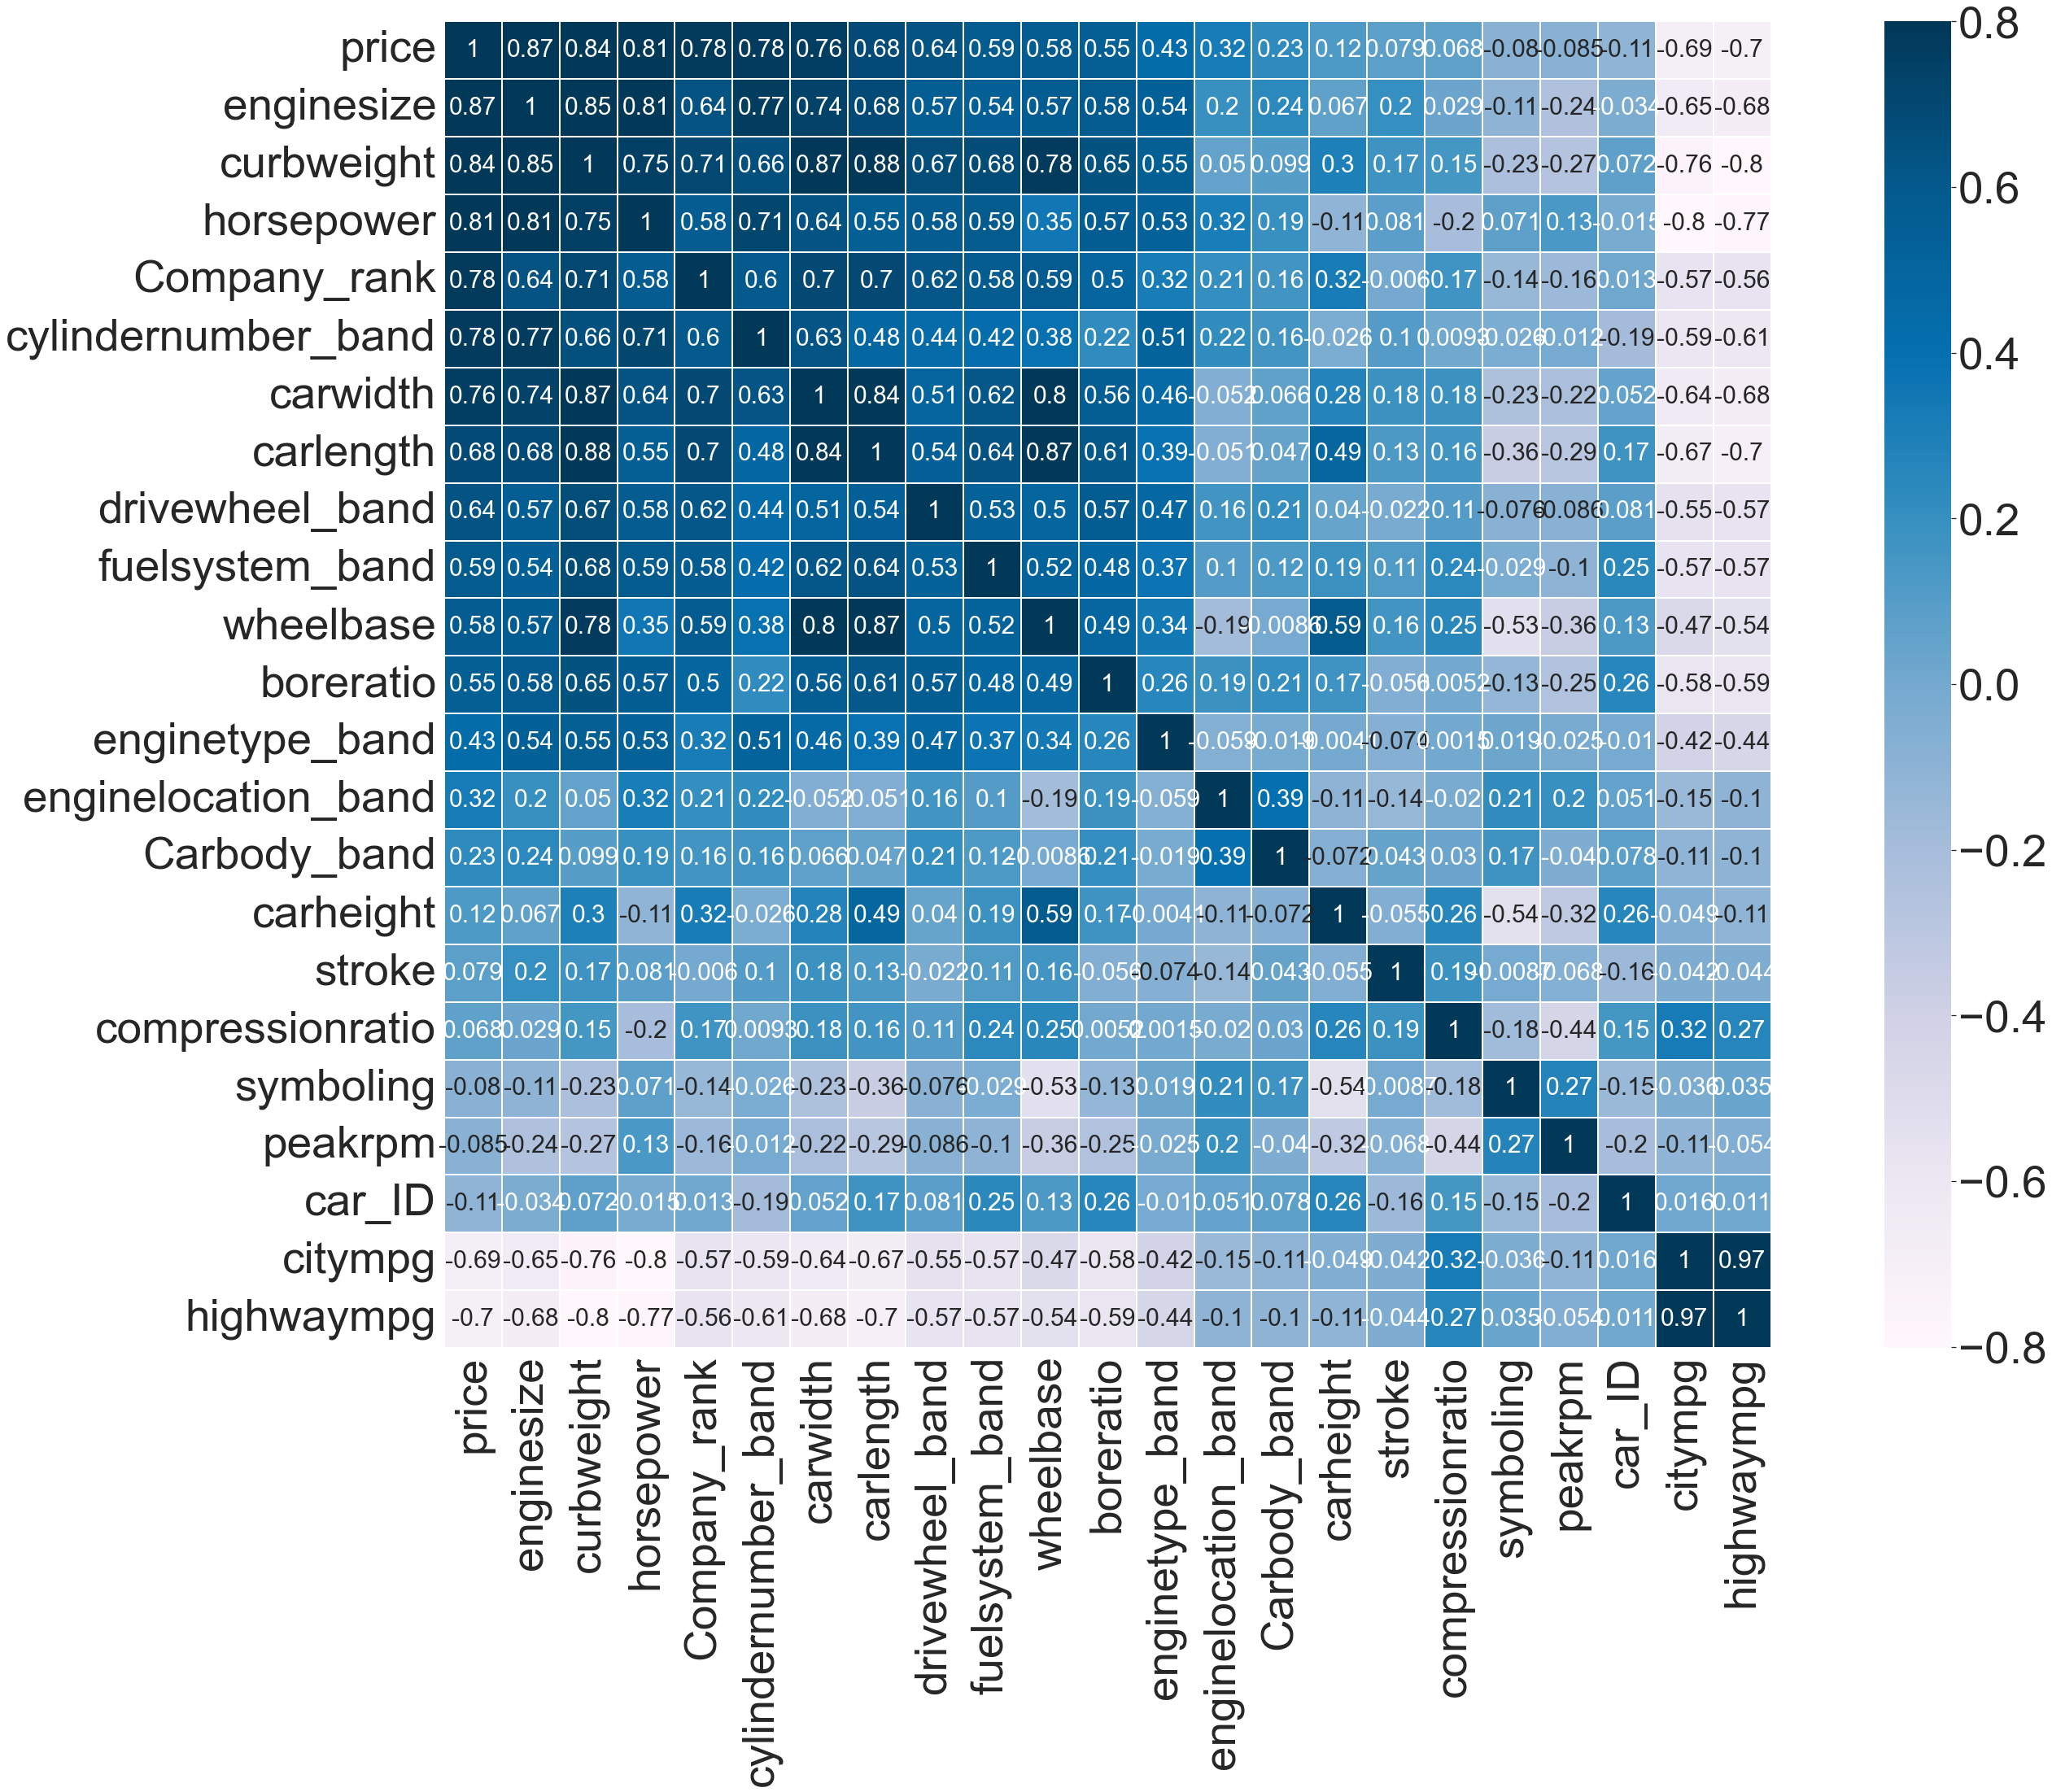

In [310]:
import numpy as np

k= 34
cols = df.corr().nlargest(k,'price')['price'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)

f , ax = plt.subplots(figsize = (50,30))
sns.set(font_scale=5.0)
sns.heatmap(cm, vmax=.8, linewidths=0.1,square=True,annot=True,cmap=colormap,
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':30},yticklabels = cols.values)

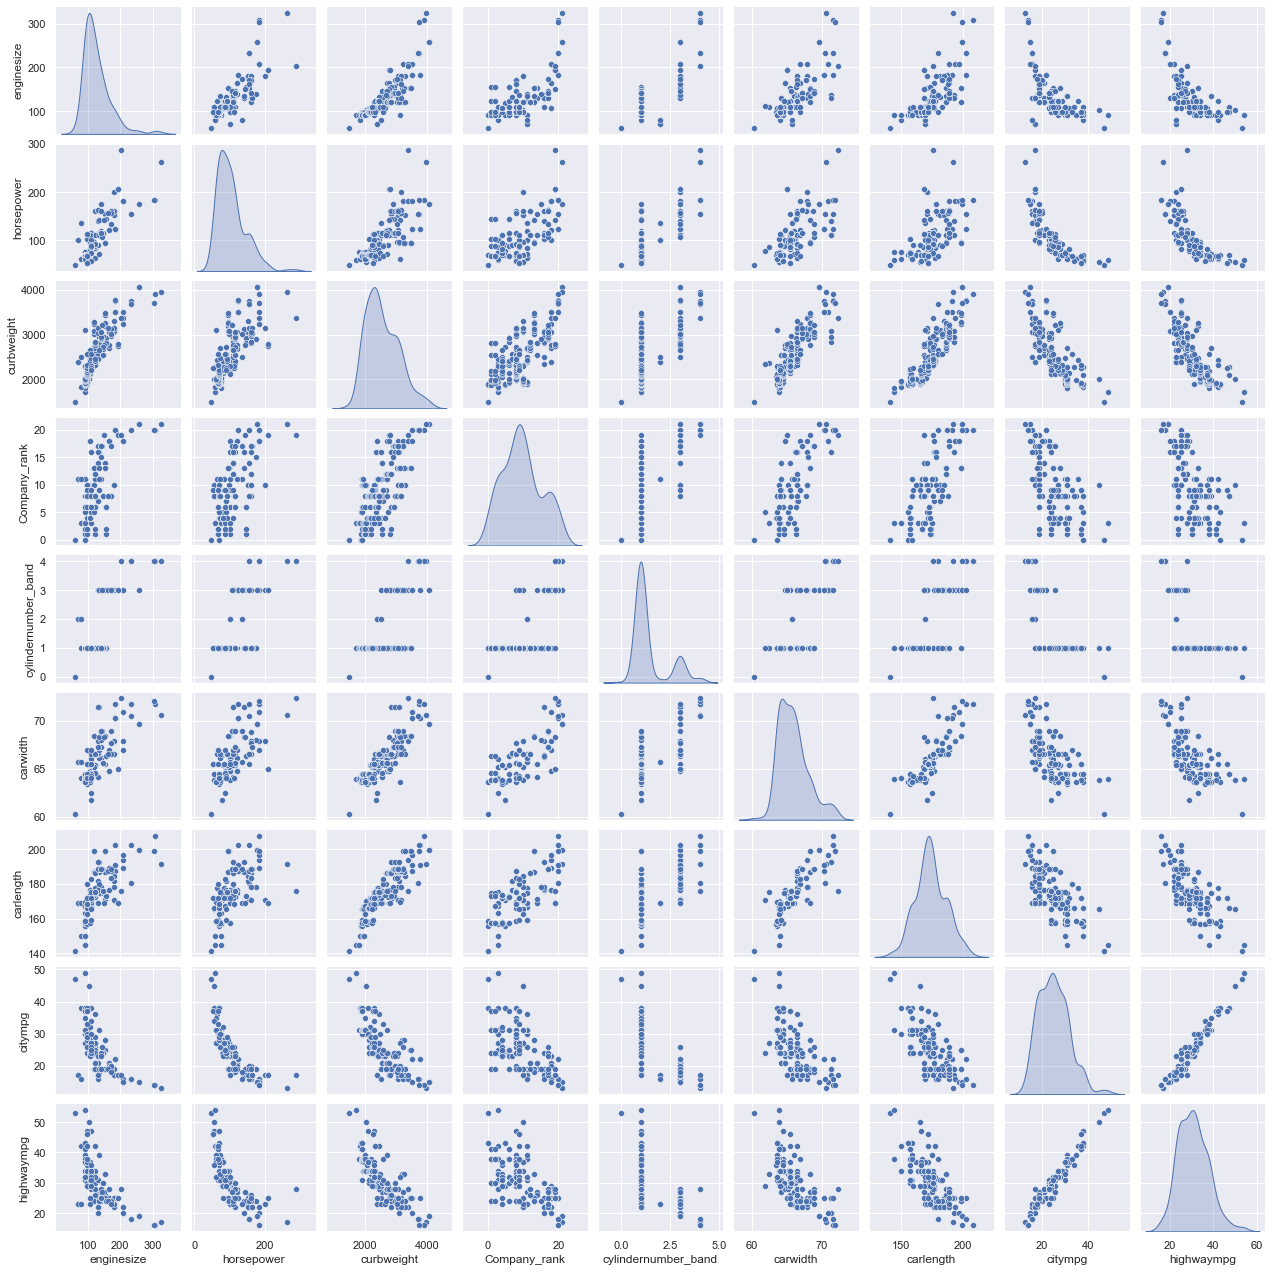

In [311]:
sns.set()
columns = ['enginesize', 'horsepower', 'curbweight', 'Company_rank','cylindernumber_band','carwidth', 'carlength','citympg', 'highwaympg']

sns.pairplot(df[columns], height = 2, kind ='scatter', diag_kind='kde')
plt.show()

# 위의 Zoomed Heat Map에서 다중공선성을 보이는 변수 중 Price와 연관이 덜 한 변수를 제외하고 PairPlot을 그립니다.

<AxesSubplot:xlabel='highwaympg', ylabel='price'>

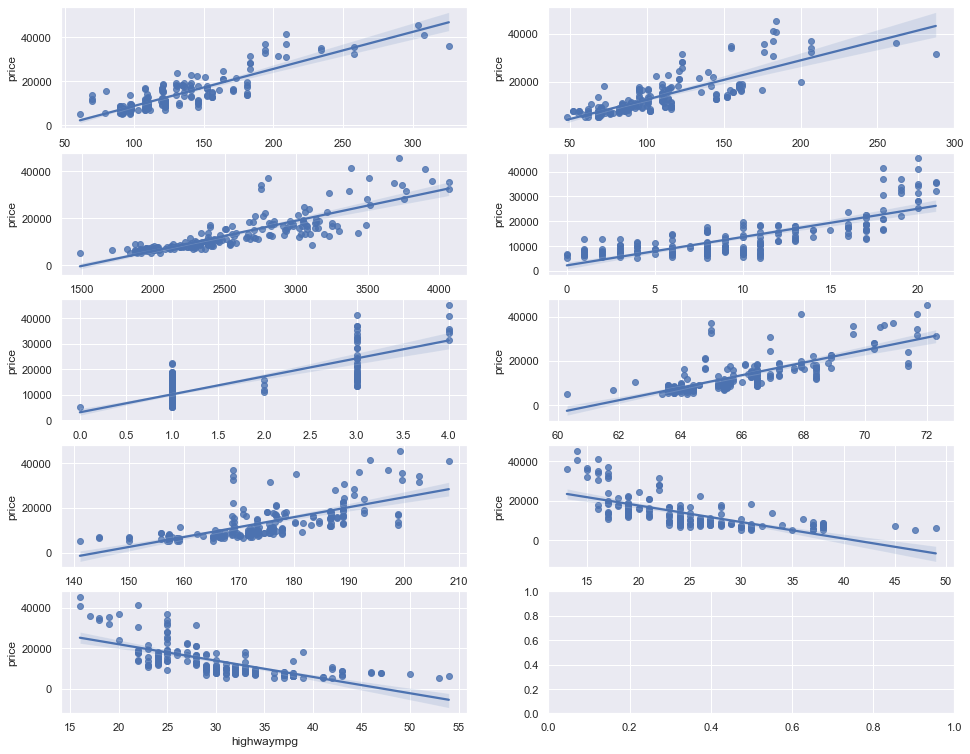

In [315]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(16,13))

enginesize_scatter_plot = pd.concat([df['price'],df['enginesize']],axis = 1)
sns.regplot(x='enginesize',y = 'price',data = enginesize_scatter_plot,scatter= True, fit_reg=True, ax=ax1)
horsepower_scatter_plot = pd.concat([df['price'],df['horsepower']],axis = 1)
sns.regplot(x='horsepower',y = 'price',data = horsepower_scatter_plot,scatter= True, fit_reg=True, ax=ax2)
curbweight_scatter_plot = pd.concat([df['price'],df['curbweight']],axis = 1)
sns.regplot(x='curbweight',y = 'price',data = curbweight_scatter_plot,scatter= True, fit_reg=True, ax=ax3)
carwidth_scatter_plot = pd.concat([df['price'],df['Company_rank']],axis = 1)
sns.regplot(x='Company_rank',y = 'price',data = carwidth_scatter_plot,scatter= True, fit_reg=True, ax=ax4)
carlength_scatter_plot = pd.concat([df['price'],df['cylindernumber_band']],axis = 1)
sns.regplot(x='cylindernumber_band',y = 'price',data = carlength_scatter_plot,scatter= True, fit_reg=True, ax=ax5)
enginesize_scatter_plot = pd.concat([df['price'],df['carwidth']],axis = 1)
sns.regplot(x='carwidth',y = 'price',data = enginesize_scatter_plot,scatter= True, fit_reg=True, ax=ax6)
horsepower_scatter_plot = pd.concat([df['price'],df['carlength']],axis = 1)
sns.regplot(x='carlength',y = 'price',data = horsepower_scatter_plot,scatter= True, fit_reg=True, ax=ax7)
curbweight_scatter_plot = pd.concat([df['price'],df['citympg']],axis = 1)
sns.regplot(x='citympg',y = 'price',data = curbweight_scatter_plot,scatter= True, fit_reg=True, ax=ax8)
carwidth_scatter_plot = pd.concat([df['price'],df['highwaympg']],axis = 1)
sns.regplot(x='highwaympg',y = 'price',data = carwidth_scatter_plot,scatter= True, fit_reg=True, ax=ax9)


# Target Feature "price"와 가장 밀접한 연관이 있다고 판단됐던 변수들의 Scatter Plot을 그립니다.
# engine size와 carwidth는 정형화된 포지션을 가지고있으므로 (생산라인으로 인해) 실제로는 범주형 데이터의 특징을 보여준다고도 말할수있음

In [ ]:
#다중공선성이 존재하는 wheel_base는 drop할 것
#연속형 변수를 범주형 혹은 서열형으로 변환하여 사용할 것 (그것이 아니라면 정규화하기)

In [316]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []
train_val = df.values

for i in range(len(df.columns)):
    vif.append(variance_inflation_factor(train_val, i))

vif_dataframe = pd.DataFrame()
vif_dataframe['columns'] = df.columns
vif_dataframe['VIF'] = vif
vif_dataframe

,columns,VIF
0,car_ID,6.412489
1,symboling,2.869555
2,wheelbase,2749.536299
3,carlength,2165.131602
4,carwidth,3938.785358
5,carheight,1135.020573
6,curbweight,519.437104
7,enginesize,124.063672
8,boreratio,540.175174
9,stroke,177.213280


이후 특징과 목적 변수 간의 연관도가 높은 특징 중에 어떤 걸 취할지 실험적인 판단이 필요함